<h1>Исследование популярности компьютерных игр</h1>

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры.
Требуется выявить закономерности, определяющие успешность той или иной игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
В исследовании будут использованы данные из открытых источников, исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

Мы располагаем данными до 2016 года. На момент исследования идет декабрь 2016 г., по его результатам бдет спланировани рекламная кампания на 2017-й.


<h1>Цели и задачи проекта</h1>

**Цель:**
Выявить определяющие успешность компьютерных игр закономерности.

**Задачи:**   
1. Провести исследовательский анализ данных
- Выяснить, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Проследить, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. Утсановить, за какой характерный срок появляются новые и исчезают старые платформы?
- Определить акруальный период для исследования и сделать выборку по этому периоду из общего массива данных.
- Выяснить, какие платформы лидируют по продажам. Растут они или падают? Выбрать несколько потенциально прибыльных платформ.
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам и описать результат.
- Проследить, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Соотнести выводы с продажами игр на других платформах
- Посмотреть на общее распределение игр по жанрам. Описать данные по самым прибыльные жанрам. Усатновить, выделяются ли жанры с высокими и низкими продажами?
2. Составить портрет пользователя каждого региона   
- Выделить самые популярные платформы (топ-5). Описать различия в долях продаж.
- Выделить самые популярные жанры (топ-5).
- Установть, влияет ли рейтинг ESRB на продажи в отдельном регионе?

3. Проверить гипотезы   
- **H<sub>0</sub>** Средние пользовательские рейтинги платформ Xbox One и PC  одинаковые;   
- **H<sub>1</sub>** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Результаты исследования будут использоваться для оценки потенциально популярного продукта и при планировании рекламных кампаний.

<h1>Этапы исследования</h1>

1. [Изучение общей информации](#section_id_1)
2. [Предобработка данных](#section_id_2)
3. [Исследовательский анализ данных](#section_id_3)
4. [Составление портрета пользователя каждого региона](#section_id_4)
5. [Формулирование и проверка гипотезы](#section_id_5)
6. [Общий вывод](#section_id_6)


<h1>Описание данных</h1>

Входные данные – исторические данные интернет-магазина «Стримчик» о продажах компьютерных игр по всему миру, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

***Name*** — название игры    
***Platform*** — платформа    
***Year_of_Release*** — год выпуска   
***Genre*** — жанр игры  
***NA_sales*** — продажи в Северной Америке (миллионы проданных копий)   
***EU_sales*** — продажи в Европе (миллионы проданных копий)   
***JP_sales*** — продажи в Японии (миллионы проданных копий)  
***Other_sales*** — продажи в других странах (миллионы проданных копий)   
***Critic_Score*** — оценка критиков (максимум 100)   
***User_Score*** — оценка пользователей (максимум 10)   
***Rating*** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

<a id='section_id_1'></a>
## Изучение общей информации ##


**Шаг 1. Откроем файл с данными и изучим общую информацию**

In [ ]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Загрузим данные из файла в датафрейм.
try:
    data = pd.read_csv('./content/drive/MyDrive/Datasets/games.csv')
except:
    data = pd.read_csv('/content/drive/MyDrive/Datasets/games.csv')

In [ ]:
# Посмотрим на первые пять строк и изучим общую информацию о полученном датафрейме
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Датафрейм содержит 16715 строк. Колонки названы с использованием разного регистра, что затрудняет читаемость. Видны пропуски в значениях. Год выпуска игры и оценки критиков указаны в формате float, оценки пользователей указаны в формате object, вместо целочисленного значения, что также затрудняет читаемость.

In [ ]:
# Изучим статистические данные для каждого столбца
pd.options.display.float_format = '{:20,.2f}'.format
data.describe(include = "all")

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,"16,446.00",16713,"16,715.00","16,715.00","16,715.00","16,715.00","8,137.00",10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,"2,006.48",NaN,0.26,0.15,0.08,0.05,68.97,NaN,NaN
std,NaN,NaN,5.88,NaN,0.81,0.50,0.31,0.19,13.94,NaN,NaN
min,NaN,NaN,"1,980.00",NaN,0.00,0.00,0.00,0.00,13.00,NaN,NaN
25%,NaN,NaN,"2,003.00",NaN,0.00,0.00,0.00,0.00,60.00,NaN,NaN
50%,NaN,NaN,"2,007.00",NaN,0.08,0.02,0.00,0.01,71.00,NaN,NaN
75%,NaN,NaN,"2,010.00",NaN,0.24,0.11,0.04,0.03,79.00,NaN,NaN


Самый ранний год релиза 1980. До 2007 гоода продажи во всех регионах либо не были зафиксированы, либо были крайне малы. К тому же, в данных присутствуют аномально большие значения продаж и пропуски. Следует изучить эти данные подробнее.

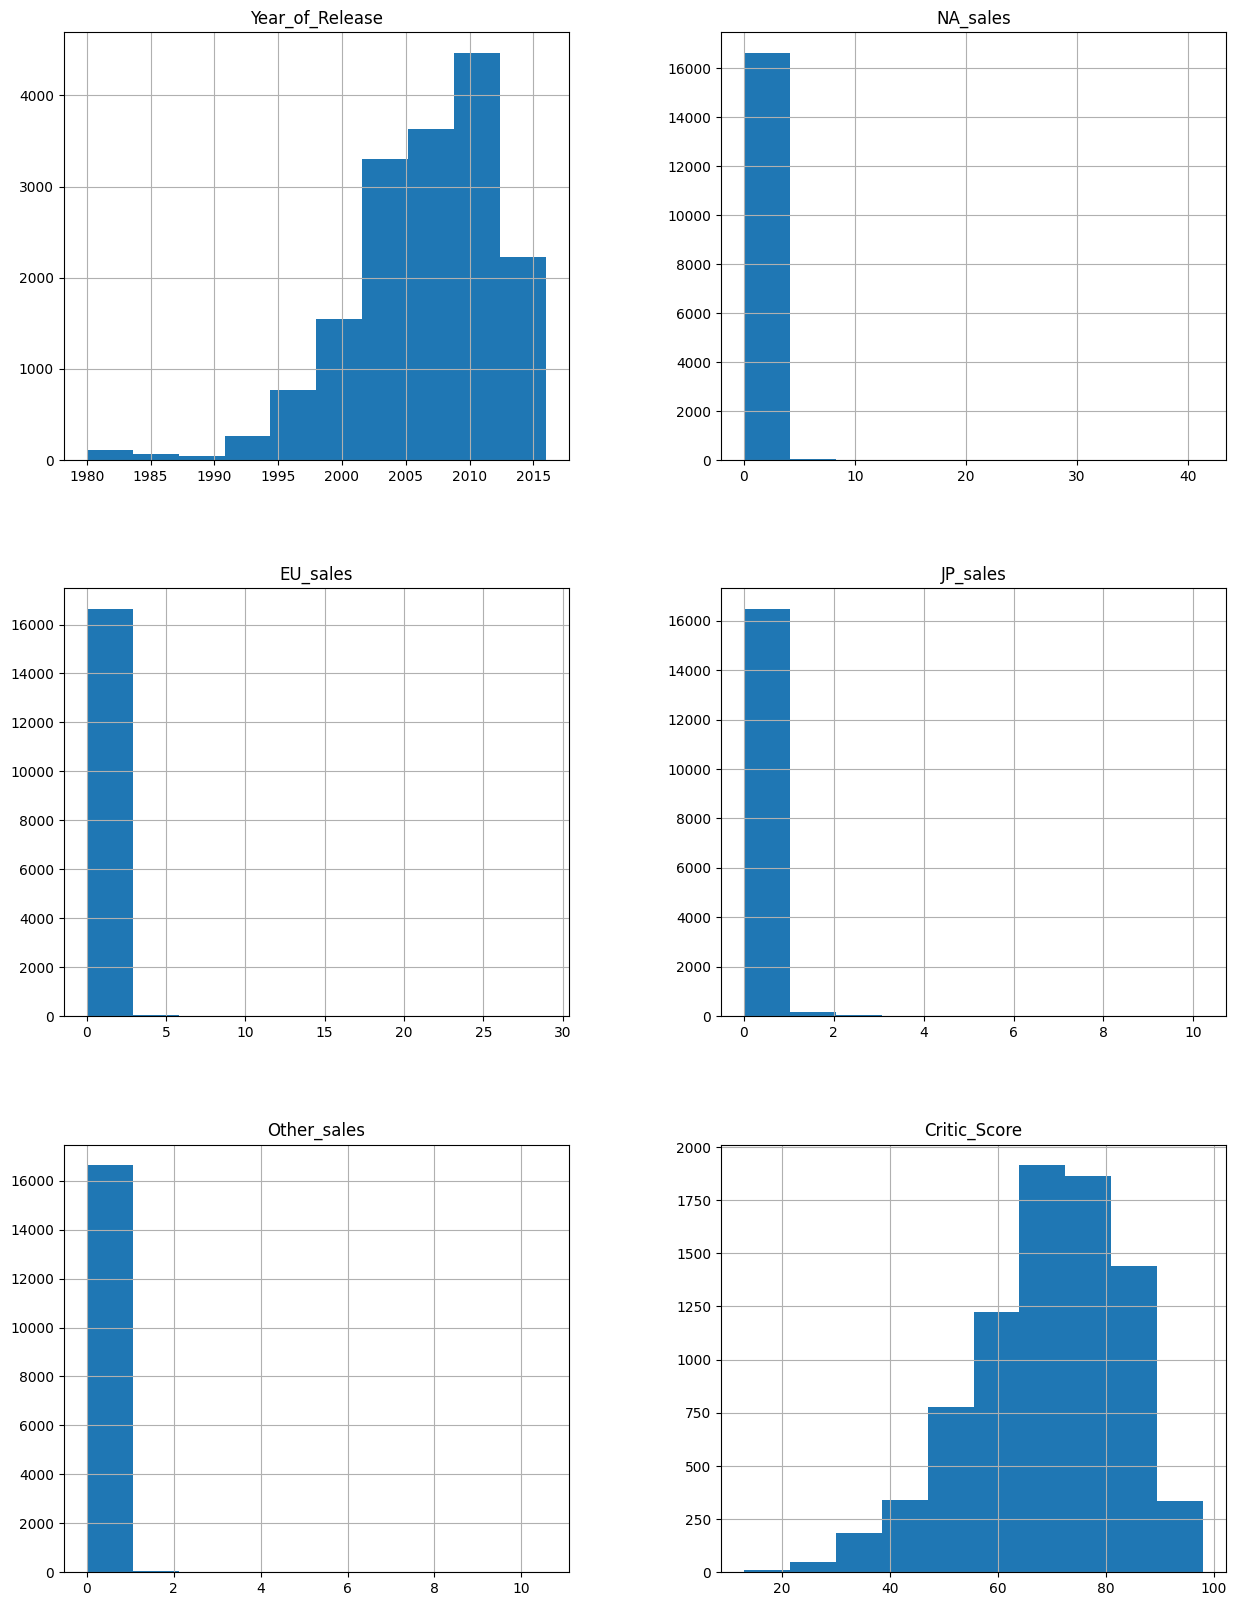

In [ ]:
# Построим общую гистограмму для всех числовых столбцов таблицы
data.hist(figsize=(15, 20));

Большинство игр вышло в период с 2005 по 2013 гг. Большинство продаж варьируется от 0 до 0.5 млн. копий. Большинство продаж приходится на американский рынок, далее идёт европейский и на последнем месте японский. Следует проверить данные на наличие выбросов и подвергнуть их обработке для лучшей читаемости графиков.

In [ ]:
# # Посчитаем пропуски
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [ ]:
# Посчитаем процент пропусков
pd.options.display.float_format = '{:20,.2f}'.format
data.isnull().mean()*100

Name                              0.01
Platform                          0.00
Year_of_Release                   1.61
Genre                             0.01
NA_sales                          0.00
EU_sales                          0.00
JP_sales                          0.00
Other_sales                       0.00
Critic_Score                     51.32
User_Score                       40.09
Rating                           40.48
dtype: float64

In [ ]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
Name,0.000000
Platform,0.000000
Year_of_Release,1.600000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.300000
User_Score,40.100000


**Вывод:**

Датаест содержит 16715 строчек с информацией о различных играх.
Типы данных некоторых ячеек датасета не соответствуют ожидаемым:
- **Year_of_Release** - float64 вместо int
- **User_Score** - object вместо float

Обнаружены пропуски в следующих колонках:
- Название игры (0.01% от всех данных)
- Год выпуска (1.61% от всех данных)
- Оценка критиков (51.32% от всех данных)
- Пользовательская оценка (40.09% от всех данных)
- Рейтинг (40.48% от всех данных)

<a id='section_id_2'></a>
## Предобработка данных ##


- Заменим названия столбцов (приведём к нижнему регистру);
- Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;
- Обработаем пропуски при необходимости:
- Объясним, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишем причины, которые могли привести к пропускам;
- Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [ ]:
# Заменим названия столбцов (приведём к нижнему регистру).
data.columns = data.columns.str.lower()

In [ ]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Для того, чтобы привести данные к нужным типам, необходимо обработать пропуски

Для начала удалим строчки с пропусками в колонке с названием игры. Такие пропуски ничем не получится восполнить и остальные данные не будут иметь смысла без названия.

In [ ]:
# Удалим строчки с пропусками в названии игры
data = data.dropna(subset=['name'])

In [ ]:
# Проверим, что пропусков больше нет
data['name'].isna().sum()

0

На предыдущем этапе работы мы выяснили, что колонка year_of_release содержит 269 пропусков, что составляет 1.61% от всех данных. Это незначительный процент, эти пропуски можно удалить.

In [ ]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)
data['year_of_release'].isna().sum()

0

In [ ]:
# Приведём столбцы year_of_release к целочисленному значению
data.loc[:, 'year_of_release'] = data['year_of_release'].astype('int')

<ipython-input-17-c27bbe2dc4b9>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, 'year_of_release'] = data['year_of_release'].astype('int')


In [ ]:
# Посмотрим на уникальные значения колонки "Пользовательская оценка"
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [ ]:
# Посчитаем количество уникальных значений колонки "Пользовательская оценка"
data['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Помимо пропусков и числовых значений в колонке присутствует значение tbd. Причем эти значения встречаются в 2376 случаях, что составляет 14.21% от всех данных этой клонки. В игровой тематике tbd означает to be determined, "будет определено". Возможно, такое значение выставляет сам пользователь, например, покупая игру и собираясь поставить оценку позднее. Т.к. для нашего исследования это равнозначно пропуску значения, переведем значения tbd в NaN

In [ ]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

In [ ]:
# Убедимся, что значений tbd больше нет
len(data[data['user_score'] == 'tbd'])

0

In [ ]:
# Пеобразуем столбец "Пользовательская оценка" к типу float
data['user_score'] = pd.to_numeric(data['user_score'])

In [ ]:
# Проверим уникальные значения в колонке "Оценка критиков"
data['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

In [ ]:
temp_data_critic_score = data.loc[data['critic_score'].isna() == True]
temp_data_critic_score.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


Не удается проследить какую-либо закономерность в появлении пропусков. Пропуски в оценках критиков встречаются в играх разных лет, различных платформ и жанров, в том числе среди очень продаваемых игр (и соответственно, пользующихся популярностью).<br>Так как пропусков в этой колонке больше 50% от всех данных, удалять их нельзя. То же самое касается пропусков в колонках пользовательских оценок и рейтинга. Решено оставить эти пропуски.

In [ ]:
data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

На предыдущих этапах исследования мы установили, что в колонке с рейтингом - более 40% пропусков. Так как эти значения категориальные, чтобы увидеть долю с пропусками на графиках, запишем их в категорию 'unknown'

In [ ]:
data['rating'] = data['rating'].fillna('unknown')

In [ ]:
# Проверим, что все изменения прошли успешно
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
# Проверим явные дубликаты в датафрейме:
data.duplicated().sum()

0

Явных дубликатов нет.

In [ ]:
data['name'].sort_values().unique()

array([' Beyblade Burst', ' Fire Emblem Fates', " Frozen: Olaf's Quest",
       ..., 'uDraw Studio', 'uDraw Studio: Instant Artist',
       '¡Shin Chan Flipa en colores!'], dtype=object)

In [ ]:
# Создадим временную копию датасета чтобы проверить наличие неявных дубликатов в названиях
temp_data = data

In [ ]:
temp_data['name'] = temp_data['name'].str.lower()

In [ ]:
temp_data['name'] = temp_data['name'].str.lower()

In [ ]:
temp_data.duplicated().sum()

0

Неявных дубликатов связанных с написанием в разных регистрах нет.

In [ ]:
# Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.
data['total_sales'] = data.loc[:, 'na_sales':'other_sales'].sum(axis=1)

In [ ]:
# Убедимся, что колонка создана
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54


**Вывод:**

Мы провели предобработку данных
- привели названия всех столбцов к нижнему регистру
- заменили тип данных в колонке с годом выпуска игры с float на int
- тип данных в колонке пользовательской оценки c object на float

В ходе предобработки данных мы удалили 2 строчки, где отсутствовали назания игр и 260 строчки, где отсутствовал год выпуска игры. Объем удаленных данных составил 1.62%.

Помимо пропусков и числовых значений в колонке пользовательской оценки было обнаружено значение tbd. Т.к. для нашего исследования это равнозначно пропуску значения, было решено перевести эти значения в NaN.

Не удалось проследить какую-либо закономерность в появлении пропусков в колонке оценки критиков. Пропуски встречаются в играх разных лет, различных платформ и жанров, в том числе среди очень продаваемых игр (и соответственно, пользующихся популярностью).
Так как пропусков в этой колонке больше 50% от всех данных, удалять их было нельзя. То же самое касается пропусков в колонках пользовательских оценок и рейтинга. Решено было оставить эти пропуски.

В колонке с рейтингом пропуски было решено выделить в отдельную категорию - 'unknown'.

Явных дубликатов в датасете обнаружено не было.

Была создана колонка с суммарными продажами во всех регионах.

<a id='section_id_3'></a>
## Исследовательский анализ данных ##


- Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмём данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов.
- Выясним, какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
- Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
- Соотнесём выводы с продажами игр на других платформах.
- Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

<Axes: title={'center': 'Выпуски игр по годам'}, xlabel='year_of_release'>

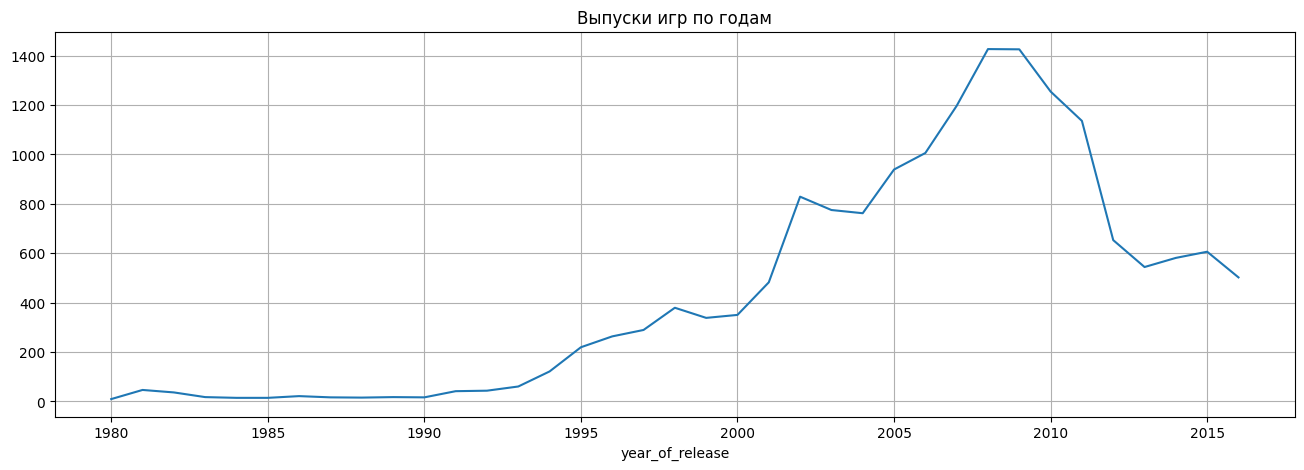

In [ ]:
# Сгруппируем игры по годам выпуска и построим график
data.groupby('year_of_release')['name'].count()\
.plot(grid=True, figsize=(16, 5), title='Выпуски игр по годам')

Можно заметить, что больше всего игр выпускалось в период 2006-2008 гг.

Для лучшей читаемости графиков исключим данные до 1993 года

In [ ]:
data_selected = data[data['year_of_release'] >=1993]

In [ ]:
# С помощью сводной таблицы выберем первые 6 платформ из отсортированных данных:
top_6_platforms = data_selected.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False
).head(6).index

<Axes: title={'center': 'Топ 6 платформ по количеству продаж'}, xlabel='year_of_release'>

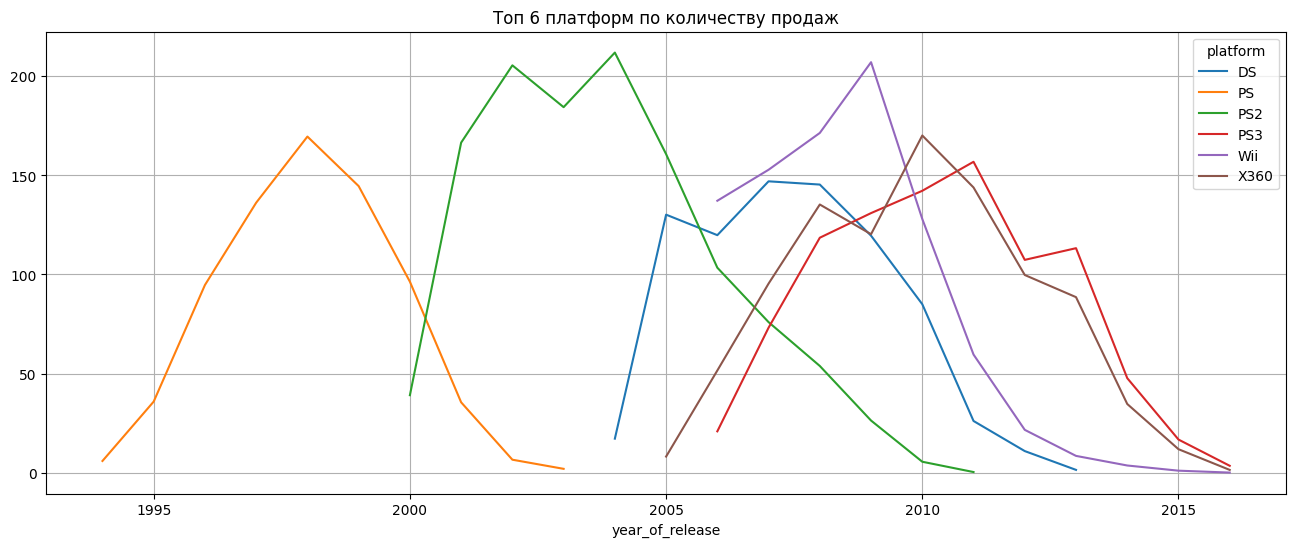

In [ ]:
# Отфильтруем эти платформы в датафрейме и построим распределение по годам:
data_selected[data_selected['platform'].isin(top_6_platforms)].groupby(
    ['platform', 'year_of_release']
)['total_sales'].sum().unstack('platform').\
plot(grid=True, figsize=(16, 6), title='Топ 6 платформ по количеству продаж')

DS - 2004-2011 (7 лет)  
PS - 1994-2004 (10 лет)  
PS2 - 2000-2011 (11 лет)  
PS3 - 2006-2016 (10 лет)  
Wii - 2006-2016 (10 лет)  
X360 - 2005-2016 (11 лет)  
Мы видим, что средний срок жизни платформы - 10 лет.

Определим актуальный период для дальнейших исследований. Т.к. основной целью исследования является составление прогноза на ближайший (2017) и последующие годы, а рынок игр довольно быстро меняется, следует взять данные за последние несколько лет. Судя по графику с распределением продаж по годам, в 2009 году закончился бум компьютерных игр и до 2013 года наблюдался спад. Начиная с 2013 года наблюдается небольшой рост. Мы считаем выбор периода с 2013 по 2016 год оптимальным для наших целей. Эти данные помогут изучить новое положение рынка компьютерных игр, пережившего спад и развивающегося сейчас в каких-то других условиях.

In [ ]:
actual_data = data[data['year_of_release'] >= 2013]

In [ ]:
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


Выясним, какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

In [ ]:
# С помощью сводной таблицы выберем первые 10 платформ из отсортированных данных:
top_10_platforms = actual_data.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False
).head(10).index

In [ ]:
top_10_platforms

Index(['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP'], dtype='object', name='platform')

<Axes: title={'center': 'Топ 10 платформ по количеству продаж'}, xlabel='year_of_release'>

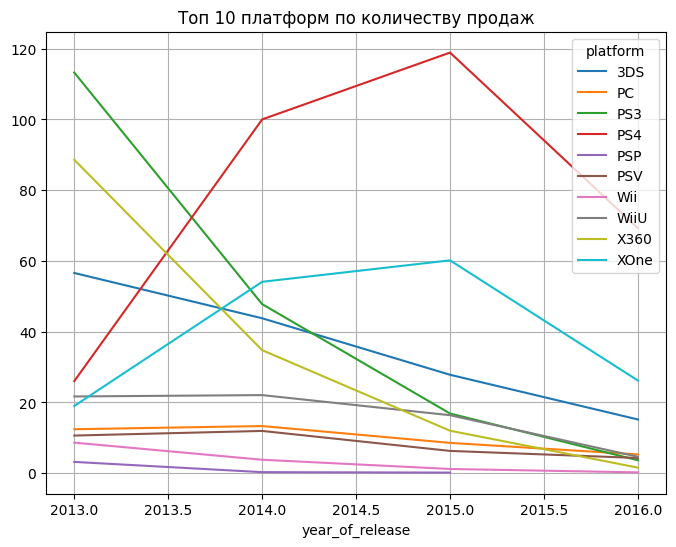

In [ ]:
# Отфильтруем эти платформы в датафрейме и построим распределение по годам:
actual_data[actual_data['platform'].isin(top_10_platforms)].groupby(
    ['platform', 'year_of_release']
)['total_sales'].sum().unstack('platform').\
plot(grid=True, figsize=(8, 6), title='Топ 10 платформ по количеству продаж')

В целом мы наблюдаем спад на рынке. Продажи на всех платформах падают. В некоторых случаях это резкий спад (платформы X360, PS3, 3DS), в каких-то плавный (WiiU, Wii), на платформах PS4 XOne продажи росли с 2014 по 2015 гг., но сейчас они тоже находятся на спаде. Платформа PSP, очевидно, прекратила поддержку в 2015 г., продажи прекратились. Из всех платформ на графике можно выделить PC и PSV, как потенциально растущие. На графиках виден небольшой излом в сторону роста.

Выведем данные в виде таблицы, чтобы рассмотреть показатели детальнее. На фоне общего спада будем считать потенциально прибыльными платформами те, которые всё еще неплохо продают, несмотря на спад.

Включим в выборку все платформы, чтобы проверить, есть ли такие платформы, у которых сумма продаж в 2016 больше, чем таковая в 2015. Т.е. это могут быть не отживающие мастадонты, попавшие в выборку топ-10 за счет больших продаж в прошлом, а быстро растущие новички.

In [ ]:
actual_data.groupby(
    ['platform', 'year_of_release']
)['total_sales'].sum().unstack('platform')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Мы видим, что несмотря на спад, всё ещё хорошо (по сравнению с другими платформами) продаются игры на платформах 3DS, PS4, XOne. В случае с PC и PSV спад не такой сильный пропорционально предыдущим годам, на них тоже можно сделать ставку, если выбирать 5 основных платформ, мы бы предложили ориентироваться на 3DS, PS4, XOne, PC и PSV. Самые большие продажи у PS4, её можно выделить как лидера рынка.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

<Axes: title={'center': 'total_sales'}, xlabel='platform'>

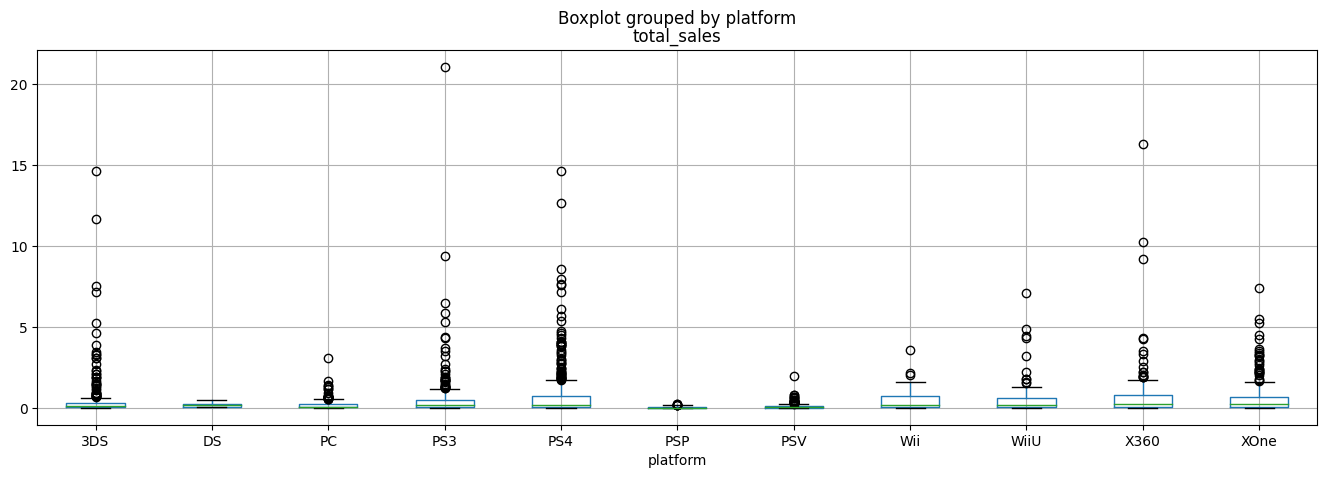

In [ ]:
actual_data.boxplot(by='platform', column='total_sales', figsize=(16, 5))

Из-за большого количества выбросов трудно рассмотреть содержимое ящиков.

(0.0, 1.8)

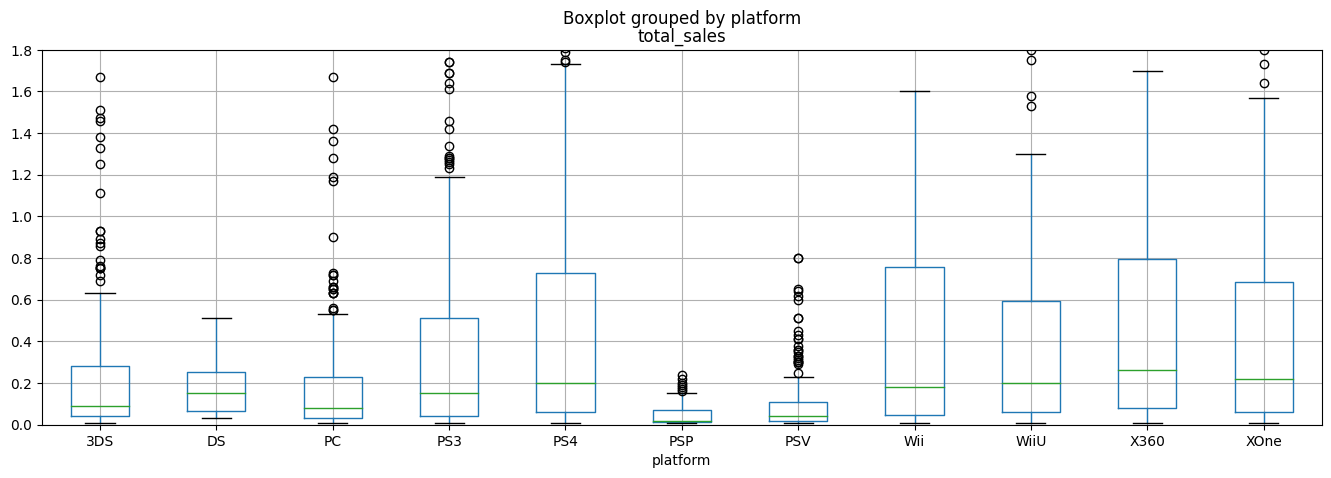

In [ ]:
# Ограничим область показа диаграммы, урезав область с выбросами
actual_data.boxplot(by='platform', column='total_sales', figsize=(16, 5))
plt.ylim(0, 1.8)

(0.0, 1.8)

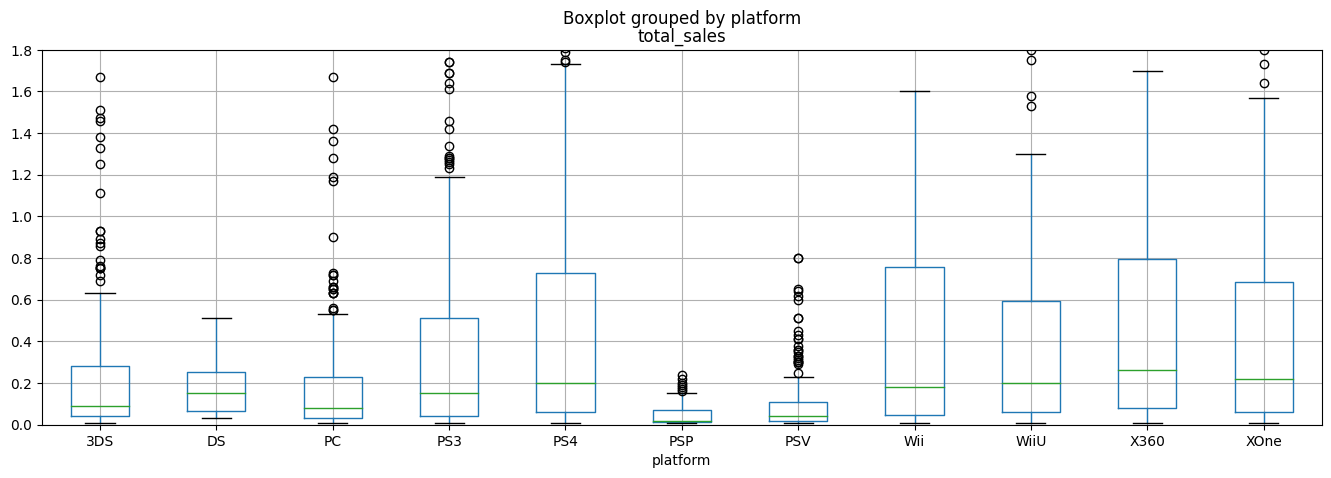

In [50]:
# Ограничим область показа диаграммы, урезав область с выбросами
actual_data.boxplot(by='platform', column='total_sales', figsize=(16, 5))
plt.ylim(0, 1.8)

У платформ PS4, 3DS, PC и XOne оченьмного выбросов в больших значениях. Это говорит о наличии отдельных очень продаваемых игр. Если посмотреть на медианные значения продаж, в целом хорошо продаются игры на платформах X360, XOne, PS4, WiiU

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитем корреляцию между отзывами и продажами. Соотнесём выводы с продажами игр на других платформах.

In [51]:
# Создадим функцию для построения диаграммы рассеяния и вычисления коэффициента корреляции
def score_and_sales_correlation(data, platform, score_type):
    data_platform = actual_data[actual_data['platform'] == str(platform)]
    sns.regplot(
        x=str(score_type),
        y='total_sales',
        data=data_platform)
    plt.xlabel(
        str(score_type))
    plt.ylabel(
        'total_sales')
    return data_platform[str(score_type)].corr(data['total_sales'])

0.40656790206178095

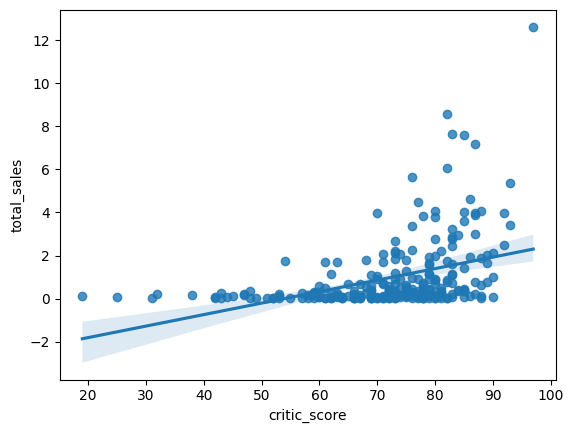

In [52]:
# Рассмотрим платформу PS4, входящую в топ-5 по продажам.
# Проследим взаимосвязь прдаж и оценок критиков
score_and_sales_correlation(actual_data, 'PS4', 'critic_score')

На диаграмме рассеяния видно, что оценка критиков значением от 55 способна повлиять на продажи. Наблюдается заметная корреляция.

-0.031957110204556424

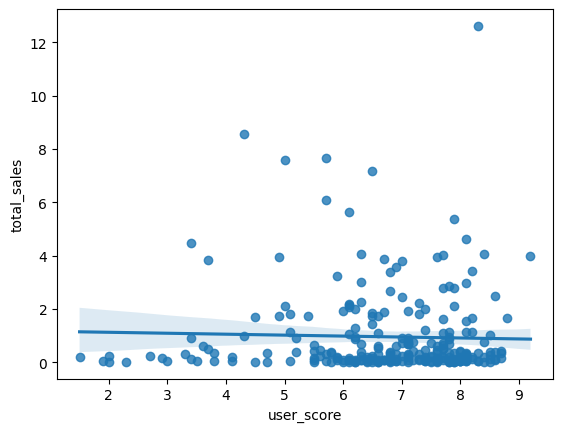

In [53]:
# Проследим взаимосвязь прдаж и оценок пользователей
score_and_sales_correlation(actual_data, 'PS4', 'user_score')

А вот оценка пользователей не влияет на продажи. Даже скорее наблюдается отрицательная корелляция, т.е. чем хуже оценка, тем лучше продажи. Возможно, это связано с тем, что у популярных игр в целом больше оценок, а соответственно, потенциално больше плохих оценок.

0.3503445460228664

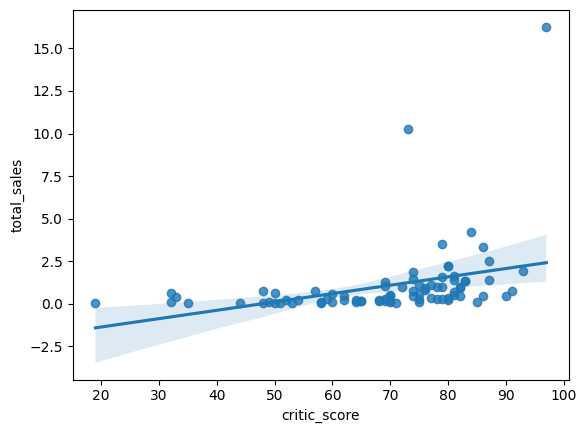

In [54]:
# Рассмотрим платформу X360, входящую в топ-5 по продажам
# Проследим взаимосвязь прдаж и оценок критиков
score_and_sales_correlation(actual_data, 'X360', 'critic_score')

-0.011742185147181342

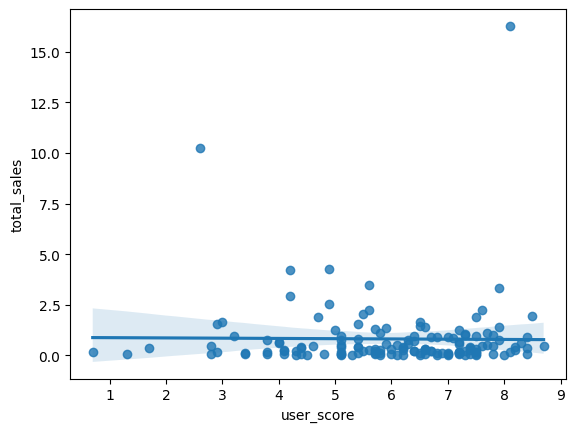

In [55]:
# Проследим взаимосвязь прдаж и оценок пользователей
score_and_sales_correlation(actual_data, 'X360', 'user_score')

На платформе X360 наблюдается похожая история, оценка критиков выше 60 влияет на продажи. Пользовательские оценки не оказывают влияния.

0.4169983280084017

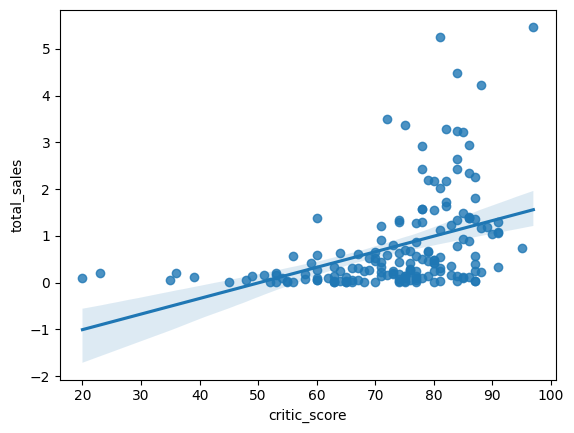

In [56]:
# Рассмотрим платформу XOne, входящую в топ-5 по продажам
# Проследим взаимосвязь прдаж и оценок критиков
score_and_sales_correlation(actual_data, 'XOne', 'critic_score')

-0.06892505328279414

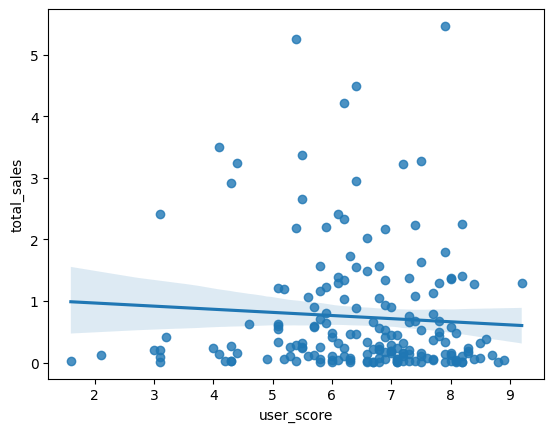

In [57]:
# Проследим взаимосвязь прдаж и оценок пользователей
score_and_sales_correlation(actual_data, 'XOne', 'user_score')

На платформе XOne оценка критиков выше 50 влияет на продажи. Пользовательские оценки практически не оказывают влияния.

Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [58]:
# Выведем медианные значения продаж по жанрам за период c 2013 по 2016 гг.
pivot_genre = actual_data.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(
    by='total_sales', ascending=False)

(0.0, 16.5)

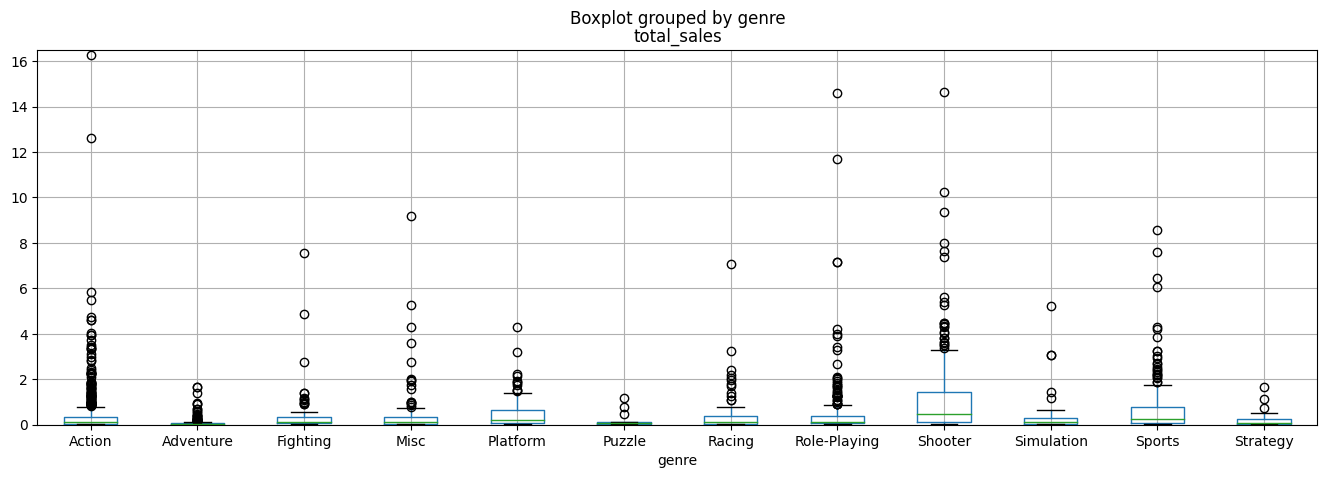

In [59]:
actual_data.boxplot(by='genre', column='total_sales', figsize=(16, 5))
plt.ylim(0, 16.5)

Диаграммы размаха показыают большое количество выбросов в жанре action. Также частые выбросы присутствуют в жанрах Adventure, Shooter, Role-playing, Sports.  

Построим круговую диаграмму по продаваемым жанрам. Для её построения решено взять медианные значения продаж, т.к. диаграммы размаха на предыдущих этапах исследования показали наличие большого количества выбросов. Медиана устойчива к выбросам и покажет более стабильные результаты.

<Axes: title={'center': 'Распределение продаж по жанрам'}, ylabel='total_sales'>

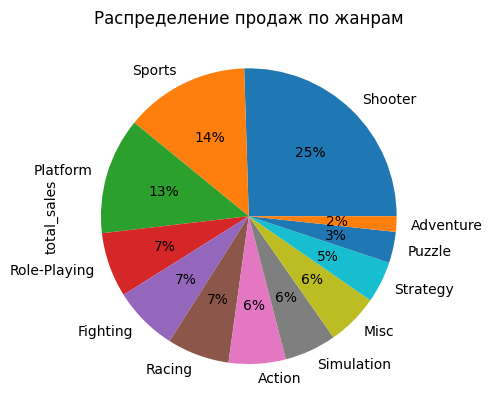

In [61]:
pivot_genre.plot(kind='pie', y=str('total_sales'), title='Распределение продаж по жанрам',\
    autopct='%1.0f%%', legend=False)

Самый продаваемый жанр - Shooter. Далее идут жанры Sports и Platform. Вместе эти три жанра занимают более 50% всего рынка. Самый плохо продающийся жанр - Adventure.

**Вывод:**  
Был проведен исследовательский анализ данных.
Мы рассмотрели, сколко игр выпускалось в разные годы, установили, что бум выпуска игр приходился на период 2006-2008 гг.
Установили, что средний срок жизни игровой платформы - 10 лет.
Выделили актуальный для нашего исследования период - 2013-2016 гг. как оптимальный для изучения  нового положения рынка компьютерных игр, пережившего спад и развивающегося сейчас в каких-то других условиях.  
Определения лидирующих платформ мы выделили топ-10 платформ по продажам за актуальный временной период.
Установили, что в целом продажи на всех платформах падают. В некоторых случаях это резкий спад (платформы X360, PS3, 3DS), в каких-то плавный (WiiU, Wii), на платформах PS4 XOne продажи росли с 2014 по 2015 гг., но сейчас они тоже находятся на спаде.

Таблица с показателями продаж по годам показала, что несмотря на спад, всё ещё хорошо (по сравнению с другими платформами) продаются игры на платформах 3DS, PS4, XOne. В случае с PC и PSV спад не такой сильный пропорционально предыдущим годам, на них тоже можно сделать ставку, если выбирать 5 основных платформ, мы бы предложили ориентироваться на 3DS, PS4, XOne, PC и PSV. Самые большие продажи у PS4, её можно выделить как лидера рынка.

Проанализировали, как влияют на продажи отзывы критиков и пользователей на примерах самых успешных платформ.
Установили, что оценка критиков способна повлиять на продажи. Наблюдается заметная корреляция. Игры с оценками выше 55(платформа PS4), 60(платформа X360) и 50(XOne) продаются лучше. Оценка пользователей не влияет на продажи. Даже скорее наблюдается отрицательная корелляция, т.е. чем хуже оценка, тем лучше продажи. Возможно, это связано с тем, что у популярных игр в целом больше оценок, а соответственно, потенциално больше плохих оценок.

Анализ распределения продаж игр по жанрам показал, что cамый продаваемый жанр - Shooter. Далее идут жанры Sports и Platform. Вместе эти три жанра занимают более 50% всего рынка. Самый плохо продающийся жанр - Adventure.

<a id='section_id_4'></a>
## Составление портрета пользователя ##

Определим для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5). Опишем различия в долях продаж.
- Самые популярные жанры (топ-5). Поясним разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [63]:
# Напишем функцию для построения круговой диаграммы по количеству продаж для топ-5 выбранных значений
def top_five_data(data, obj, region_sales):
    title = f'Top-5 {obj} in {region_sales}'
    pivot = data.groupby(str(obj)).\
    agg({str(region_sales): 'sum'}).sort_values(by=str(region_sales), ascending=False)[:5]
    pivot.plot(kind='pie', y=str(region_sales),\
               title=title,\
               autopct='%1.0f%%', legend=False)

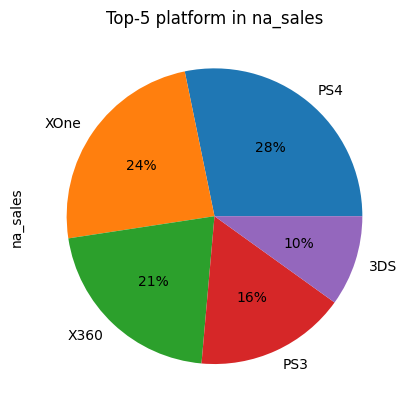

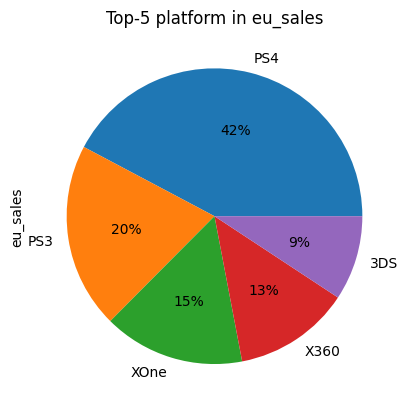

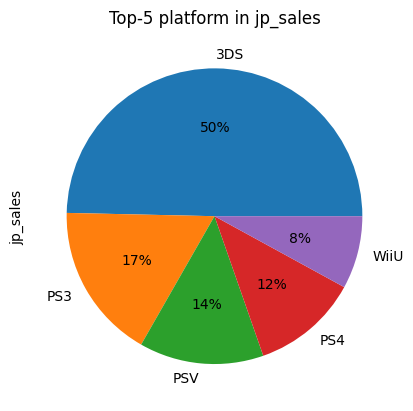

In [64]:
# Построим круговые диаграммы топ-5 платформ для регионов NA, EU, JP
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top_five_data(actual_data, 'platform', region)

Можно увидеть, что в Америке и Европе лидирует PS4, однако, в разной степени. В Америке эта платформа тесно конкурирует с XOne. В Европе PS4 лидирует с отрывом более 20%. В Японии же абсолютный лидер - 3DS, а XOne, такая популярная в Америке, даже не вошла в топ-5.

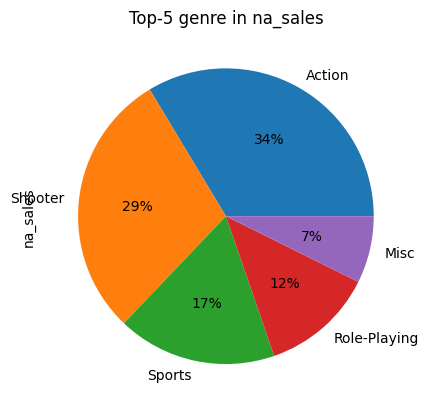

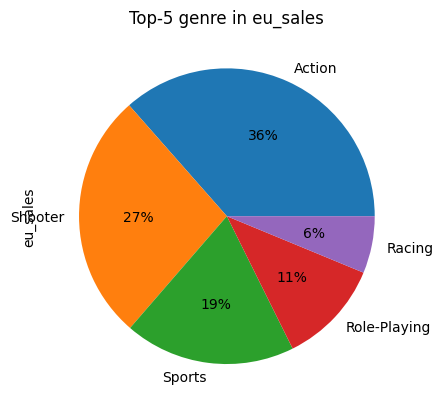

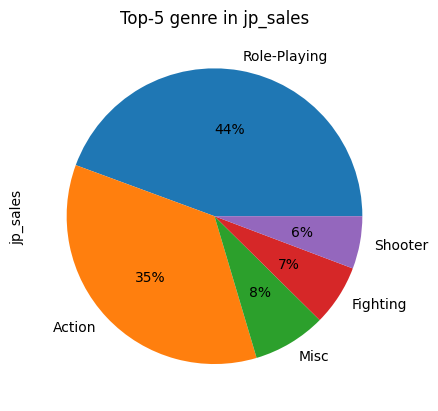

In [65]:
# Построим круговые диаграммы топ-5 жанров для регионов NA, EU, JP
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top_five_data(actual_data, 'genre', region)

И здесь заметны каринальные различия между Американским и Европейским рынками и Японским. В Америке и Европе самый популярный жанр - Action, на втором месте Shooter и на третьем - Sports. В Японии совсем другое распределение - первое место занимают игры в жанре Role-Playing, далее идет Action. Эти два жанра занимают главенствующее место на круговой диаграмме, в совокупности 79% среди самых популярных игровых жанров. На третьем месте игры в жарне Music. Shooter-ы же занимают самое последнее место.

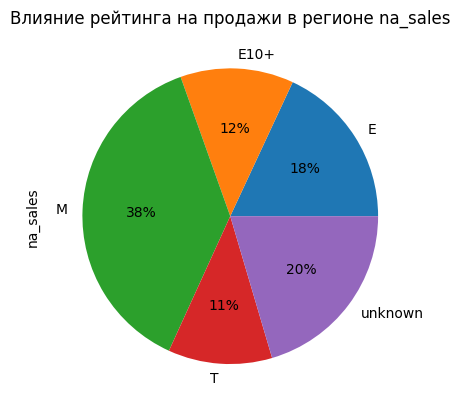

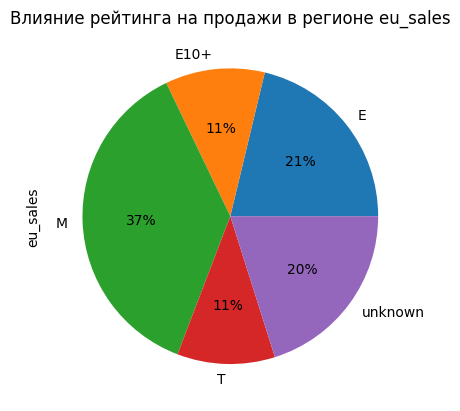

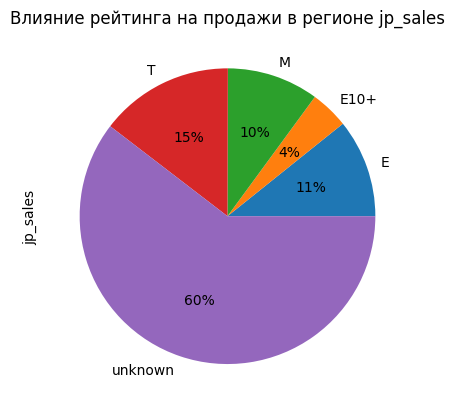

In [66]:
# Построим диаграммы влияния рейтинга ESRB на продажи по выбранным регионам
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    actual_data.pivot_table(index='rating', values=region, aggfunc='sum').\
    plot(kind='pie', y=region, title=f'Влияние рейтинга на продажи в регионе {region}',\
               autopct='%1.0f%%', legend=False)

Влияние рейтинга на продажи в Америке и Европе почти идентично. Подавляющее большинство продаваемых игр имеет рейтинг M ("Для взрослых"). В случае же с Японией рейтинг для 60% проданных игр неизвестен, что делает анализ невозможным.

**Вывод:**  
Изучив диаграммы по количеству продаж для топ-5 выбранных платформ в регионах NA, EU, JP, удалось установить, в Америке и Европе лидирует PS4, однако, в разной степени. В Америке эта платформа тесно конкурирует с XOne. В Европе PS4 лидирует с отрывом более 20%. В Японии же абсолютный лидер - 3DS, а XOne, такая популярная в Америке, даже не вошла в топ-5.

Изучив диаграммы для топ-5 жанров для регионов NA, EU, JP были отмечены кардинальные различия между Американским и Европейским рынками и Японским. В Америке и Европе самый популярный жанр - Action, на втором месте Shooter и на третьем - Sports. В Японии совсем другое распределение - первое место занимают игры в жанре Role-Playing, далее идет Action. Эти два жанра занимают главенствующее место на круговой диаграмме, в совокупности 79% среди самых популярных игровых жанров. На третьем месте игры в жарне Music. Shooter-ы же занимают самое последнее место.

Мы также рассмотрели влияние рейтинга ESRB на продажи по выбранным регионам.
Влияние рейтинга на продажи в Америке и Европе почти идентично. Подавляющее большинство продаваемых игр имеет рейтинг M ("Для взрослых"). В случае же с Японией рейтинг для 60% проданных игр неизвестен, что делает анализ невозможным.

<a id='section_id_5'></a>
## Проверка гипотезы ##

- Средние пользовательские рейтинги платформ Xbox One и PC за период c 2013 по 2016 гг. одинаковые;   
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

На этом этапе иследования пропуски в колонке с пользовательским рейтингом будут нам мешать. Удалим их.

In [67]:
user_score_data = actual_data.dropna(subset=['user_score']).reset_index(drop=True)
user_score_data['user_score'].isna().sum()

0

Сформулируем гипотезы.  
**H<sub>0</sub>** Средний пользовательский рейтинг платформы Xbox One == средний пользовательский рейтинг платформы PC;     
**H<sub>1</sub>** Средний пользовательский рейтинг платформы Xbox One != средний пользовательский рейтинг платформы PC;

In [71]:
# Проверим гипотезу "Средний пользовательский рейтинг платформы Xbox One == средний пользовательский рейтинг платформы PC"
ratings_pc = user_score_data[user_score_data['platform']=='PC']['user_score']
ratings_xone = user_score_data[user_score_data['platform']=='XOne']['user_score']

results = st.ttest_ind(
    ratings_pc,
    ratings_xone,
    equal_var = False)

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Сформулируем гипотезы.  
**H<sub>0</sub>** Средний пользовательский рейтинг жанра Action == средний пользовательский рейтинг жанра Sports;  
**H<sub>1</sub>** Средний пользовательский рейтинг жанра Action != средний пользовательский рейтинг жанра Sports;

In [70]:
# Проверим гипотезу "Средний пользовательский рейтинг жанра Action != средний пользовательский рейтинг жанра Sports"
ratings_action = user_score_data[user_score_data['genre']=='Action']['user_score']
ratings_sports = user_score_data[user_score_data['genre']=='Sports']['user_score']

results = st.ttest_ind(
    ratings_action,
    ratings_sports,
    equal_var = False)

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


**Вывод:**  
Не удалось отвергнуть гипотезу "Средний пользовательский рейтинг платформы Xbox One == средний пользовательский рейтинг платформы PC". Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
Гипотеза "Средний пользовательский рейтинг жанра Action == средний пользовательский рейтинг жанра Sports" должна быть отвергнута. Средние пользовательские рейтинги жанров Action и Sports не одинаковые

<a id='section_id_6'></a>
## Общий вывод ##

В ходе проведения исследования мы проверили несколько гипотез:

- **Гипотеза 1:** отзывы критиков влияют на продажи внутри популярной платформы;
Подтверждена. Коэффициенты корреляции на трёх самых популярных платформах (PS4, X360, XOne) варьируются от 0,35 до 0,41. Таким образом корелляция прослеживается, продажи увеличиваются с ростом оценки критиков.
- **Гипотеза 2:** отзывы пользователей влияют на продажи внутри популярной платформы;
Отвергнута. Коэффициенты корреляции на трёх самых популярных платформах (PS4, X360, XOne) варьируются от -0,01 до -0,06, что говорит об отсутствии увеличения продаж в зависимости от оценки пользователей.
- **Гипотеза 3:** рейтинг ESRB влияет на продажи в отдельном регионе;
Подтверждена для Северной Америки и Европы. Рейтинг "М" значительно влияет на продажи. В случае с Японией проверить гипотезу не удалось в виду недостатка данных.
- **Гипотеза 4:** средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Подтверждена. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- **Гипотеза 5:** средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.
Отвергнута. Средние пользовательские рейтинги жанров Action и Sports разные.

Рекомендации для рекламной кампании на будущий год:
- В рекламных кампаниях следует делать ставку платформу PS4 в Америке и Европе и платформу 3DS в Японии.
- Продвигать игры в жанрах Shooter, Sports, Platform (и Role-playing для Японского рынка).
- Хорошо продаются игры с рейтингом М, имеет смысл их продвигать.
- Оценка критиков предпочтительна не менее 55.
- Оценкой пользователей можно пренебречь, она не влияет на продажи.